# **Data Modeling**


---



---

In this third and the last part of the series, we will built models on the Covid-19 tweets data on supervised machine learning models. We are using a general machine learning pipeline to outline this project.

## Import Data & Libraries
## Data Info
## **Tokenization**
## Data Cleaning and Formatting
## **Lemmatization**
## Feature selection
## Split Train/Test
## **TF-IDF**
## Establish a baseline
# **Machine Learning Models**
### 1. Random Forest Classifer
### 2. Naive Bayes Classifier
### 3. Stochastic Gradient Decent Classifier
### 4. Extreme Gradient Boosting Classifier
### 5. Logistic Regression Classifier
### 6. Support Vector Machine Classifier
### 7. Linear Support Vector Machine Classifier
## **Model Accuracy Comparison**
## **Hyperparameter Tuning**
## **Feature Importance**
## **Conclusion**
## Future Work

## Uploads

In [2]:
from google.colab import files
upload=files.upload()

Saving new_corona_NLP_train.csv to new_corona_NLP_train.csv


## Importing Libraries

In [3]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import string

# OS services
import os

# Save file
# from sb_utils import save_file

#Natural language toolkit
import nltk
import nltk.corpus
from nltk.stem import LancasterStemmer

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 60)

# Suppress future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import plotly as plotly
import plotly.express as px
from plotly import __version__
from plotly import tools
import plotly.graph_objs as go
import plotly.offline as py 
from plotly.offline import init_notebook_mode, plot 
init_notebook_mode(connected=True)

# Set default font size
plt.rcParams['font.size'] = 24
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Imputing missing values and scaling values
# from sklearn.preprocessing import Imputer, MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer 
from sklearn.feature_extraction.text import CountVectorizer
# imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Train, test, split
from sklearn.model_selection import train_test_split


# Machine Learning Models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR, SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
#from sklearn.neighbors import KNeighborsRegressor
#from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
import xgboost as xgb
#from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
#from sklearn.svm import LinearSVC


# Evaluation of model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report


# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#Statistical function
from scipy.stats import norm
from tabulate import tabulate

# Miscellaneous
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
from IPython.display import Image as PImage

## Data Info

In [68]:
data_twitter_corona_train = pd.read_csv('/content/new_corona_NLP_train.csv', encoding= 'latin-1')
#data_twitter_corona_test = pd.read_csv('/content/Corona_NLP_test.csv', encoding= 'latin-1')

In [69]:
original_data_train = pd.read_csv('/content/new_corona_NLP_train.csv', encoding= 'latin-1')

In [70]:
data_twitter_corona_train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,text
0,3799,48751,London,16-03-2020,NaN,1,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
1,3800,48752,UK,16-03-2020,advice Talk neighbours family exchange phone n...,2,advice Talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths give elderly...,2,Coronavirus Australia: Woolworths to give elde...
3,3802,48754,NaN,16-03-2020,"My food stock one empty... PLEASE, panic, THER...",2,My food stock is not the only one which is emp...
4,3803,48755,NaN,16-03-2020,"Me, ready go supermarket outbreak. Not I'm par...",0,"Me, ready to go at supermarket during the #COV..."


In [71]:
original_data_train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,text
0,3799,48751,London,16-03-2020,NaN,1,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
1,3800,48752,UK,16-03-2020,advice Talk neighbours family exchange phone n...,2,advice Talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths give elderly...,2,Coronavirus Australia: Woolworths to give elde...
3,3802,48754,NaN,16-03-2020,"My food stock one empty... PLEASE, panic, THER...",2,My food stock is not the only one which is emp...
4,3803,48755,NaN,16-03-2020,"Me, ready go supermarket outbreak. Not I'm par...",0,"Me, ready to go at supermarket during the #COV..."


In [72]:
data_twitter_corona_train.shape

(41157, 7)

In [73]:
original_data_train.shape

(41157, 7)

In [74]:
import re
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Tokenization
Tokenization is the first step in NLP. It is the process of breaking strings into tokens, which in turn are small structures or units

In [75]:
# Tokenizing the words present in the training set
tokenized_tweet = data_twitter_corona_train['text'].apply(lambda x: x.split()) 

## Data Cleaning and Formatting (once again)
Let's do the data cleaning once again to make sure all the data is in the same format such as making all text lower, removing text in square brackets, and removing links, punctuation, and words containing numbers.

In [76]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

# Applying the cleaning function to both test and training datasets
data_twitter_corona_train['text'] = data_twitter_corona_train['text'].apply(lambda x: clean_text(x))

# test['text'] = test['text'].apply(lambda x: clean_text(x))

# Let's take a look at the updated text
data_twitter_corona_train['text'].head()

0               menyrbie philgahan chrisitv  and  and 
1    advice talk to your neighbours family to excha...
2    coronavirus australia woolworths to give elder...
3    my food stock is not the only one which is emp...
4    me ready to go at supermarket during the  outb...
Name: text, dtype: object

In [77]:
data_twitter_corona_train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,text
0,3799,48751,London,16-03-2020,NaN,1,menyrbie philgahan chrisitv and and
1,3800,48752,UK,16-03-2020,advice Talk neighbours family exchange phone n...,2,advice talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths give elderly...,2,coronavirus australia woolworths to give elder...
3,3802,48754,NaN,16-03-2020,"My food stock one empty... PLEASE, panic, THER...",2,my food stock is not the only one which is emp...
4,3803,48755,NaN,16-03-2020,"Me, ready go supermarket outbreak. Not I'm par...",0,me ready to go at supermarket during the outb...


Now append the clean text with the data.

In [78]:
data_twitter_corona_train['clean_text']=data_twitter_corona_train['text'].apply(clean_text)
data_twitter_corona_train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,text,clean_text
0,3799,48751,London,16-03-2020,NaN,1,menyrbie philgahan chrisitv and and,menyrbie philgahan chrisitv and and
1,3800,48752,UK,16-03-2020,advice Talk neighbours family exchange phone n...,2,advice talk to your neighbours family to excha...,advice talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths give elderly...,2,coronavirus australia woolworths to give elder...,coronavirus australia woolworths to give elder...
3,3802,48754,NaN,16-03-2020,"My food stock one empty... PLEASE, panic, THER...",2,my food stock is not the only one which is emp...,my food stock is not the only one which is emp...
4,3803,48755,NaN,16-03-2020,"Me, ready go supermarket outbreak. Not I'm par...",0,me ready to go at supermarket during the outb...,me ready to go at supermarket during the outb...


In [79]:
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

from collections import defaultdict
from collections import  Counter
stop=set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Now split the words evenly including spaces.

In [80]:
data_twitter_corona_train['clean_text'] = data_twitter_corona_train['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
data_twitter_corona_train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,text,clean_text
0,3799,48751,London,16-03-2020,NaN,1,menyrbie philgahan chrisitv and and,menyrbie philgahan chrisitv
1,3800,48752,UK,16-03-2020,advice Talk neighbours family exchange phone n...,2,advice talk to your neighbours family to excha...,advice talk neighbours family exchange phone n...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths give elderly...,2,coronavirus australia woolworths to give elder...,coronavirus australia woolworths give elderly ...
3,3802,48754,NaN,16-03-2020,"My food stock one empty... PLEASE, panic, THER...",2,my food stock is not the only one which is emp...,food stock one empty please dont panic enough ...
4,3803,48755,NaN,16-03-2020,"Me, ready go supermarket outbreak. Not I'm par...",0,me ready to go at supermarket during the outb...,ready go supermarket outbreak im paranoid food...


In [81]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

## Lemmatization
**Lemmatization** and **stemming** are two important steps in natural language processing (NLP). Lemmatization is the process of converting a word to its base form while stemming is a rule-based approach that removes the last few characters to try to derive the root form of a word. Although stemming is faster, it often leads to incorrect meanings and spelling errors. On the other hand, lemmatization has higher accuracy and is preferred for context analysis, while stemming is recommended when the context is not important. In our case, context is not important so we are going to use lemmatization.

In [82]:
lemmation_data = WordNetLemmatizer()

def preprocessdata(text):
    text= ' '.join(lemmation_data.lemmatize(word) for word in text.split(' '))
    return text

data_twitter_corona_train['final_text']=data_twitter_corona_train['clean_text'].apply(preprocessdata)
data_twitter_corona_train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,text,clean_text,final_text
0,3799,48751,London,16-03-2020,NaN,1,menyrbie philgahan chrisitv and and,menyrbie philgahan chrisitv,menyrbie philgahan chrisitv
1,3800,48752,UK,16-03-2020,advice Talk neighbours family exchange phone n...,2,advice talk to your neighbours family to excha...,advice talk neighbours family exchange phone n...,advice talk neighbour family exchange phone nu...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths give elderly...,2,coronavirus australia woolworths to give elder...,coronavirus australia woolworths give elderly ...,coronavirus australia woolworth give elderly d...
3,3802,48754,NaN,16-03-2020,"My food stock one empty... PLEASE, panic, THER...",2,my food stock is not the only one which is emp...,food stock one empty please dont panic enough ...,food stock one empty please dont panic enough ...
4,3803,48755,NaN,16-03-2020,"Me, ready go supermarket outbreak. Not I'm par...",0,me ready to go at supermarket during the outb...,ready go supermarket outbreak im paranoid food...,ready go supermarket outbreak im paranoid food...


## Extraction and Feature Selection

Let's extract the features, split them into the train, and test for model building.

In [83]:
# Splitting data into features(X) and targets(y)
X = data_twitter_corona_train['final_text']
y = data_twitter_corona_train['Sentiment'].values

## Train-Test Split

In [84]:
# splitting the training data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

The shape of the Train and Test data looks like this,

In [85]:
X_train.shape, y_train.shape

((32925,), (32925,))

In [86]:
X_test.shape, y_test.shape

((8232,), (8232,))

## TF-IDF
Term Frequency – Inverse Document Frequency (TF-IDF) is a widely used statistical method in natural language processing and information retrieval. It measures how important a term is within a document relative to a collection of documents. 


CountVectorizer is also another term used to count the number of times a word appears in a document (using a bag-of-words approach), while TF-IDF Vectorizer takes into account not only how many times a word appears in a document but also how important that word is to the whole corpus.

Here we have to minimize the number of features to avoid system crashes by setting `min_df` to very low like 3. Also, no need to use `toarray()` for every system crashes as it increases the size of the data.

In [87]:
tfidf = TfidfVectorizer()
#X_train = tfidf.fit_transform(X_train).toarray()

X_train = tfidf.fit_transform(X_train)

#X_test = tfidf.transform(X_test).toarray()

X_test = tfidf.transform(X_test)

```
Issues faced: Used all the RAM, system crashes
Your session crashed after using all available RAM.
System RAM
5.0 / 12.7 GB
Disk
23.5 / 107.7 GB
```






In [24]:
X_train

<32925x46051 sparse matrix of type '<class 'numpy.float64'>'
	with 544488 stored elements in Compressed Sparse Row format>

# Establish a Baseline

We are establish a rough baseline here as reference to comparing models using the mean absolute error. 

Another way to establish a baseline is by chosing any actual model from below that performed well.

In [24]:
# Function to calculate mean absolute error
# X_train, X_test, y_train, y_test

def mae(y_train, y_test):
    return np.mean(abs(y_train - y_test))

#Now we can make the median guess and evaluate it on the test set.

baseline_guess = np.median(y_train)

print('The baseline guess is a score of %0.2f' % baseline_guess)
print("Baseline Performance on the test set: MAE = %0.4f" % mae(y_test, baseline_guess))

The baseline guess is a score of 1.00
Baseline Performance on the test set: MAE = 0.8113


In [25]:
#baseline_guess
mae(y_test, baseline_guess)

0.8113459669582118

# Machine Learing Models
We will compare seven different supervised machine learning models using the great Scikit-Learn library:
## 1. Random Forest Classifier
Random Forest is a supervised machine-learning algorithm made up of decision trees that are merged together for a more accurate prediction.
Random Forest is used for both classification (each tree gives a classification or a vote) and regression (the forest picks the average of the outputs of all trees) for example, classifying whether an email is “spam” or “not spam”
Random Forest is used across many different industries, including banking, retail, and healthcare, to name just a few!
Overall, Random Forest is accurate, efficient, and relatively quick to develop, making it an extremely handy tool for data professionals.


In [26]:
#model_rf = RandomForestClassifier(max_depth=50) # lower the max depth to reduce memory usage, default is 100
model_rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

In [27]:
print("Training Accuracy :", model_rf.score(X_train, y_train))
print("Testing/Validation Accuracy :", model_rf.score(X_test, y_test))

# Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)   # labels=[1,0]
#print('\n[[ TP FP]')
#print('[ FN TN]]')
print('\n',cm_rf)

Training Accuracy : 0.9998785117691723
Testing/Validation Accuracy : 0.7459912536443148

 [[2177  251  634]
 [ 230 1007  316]
 [ 457  203 2957]]


Increase in max_depth increases the training and testing accuracy.

There are 4-potential outcomes here, 

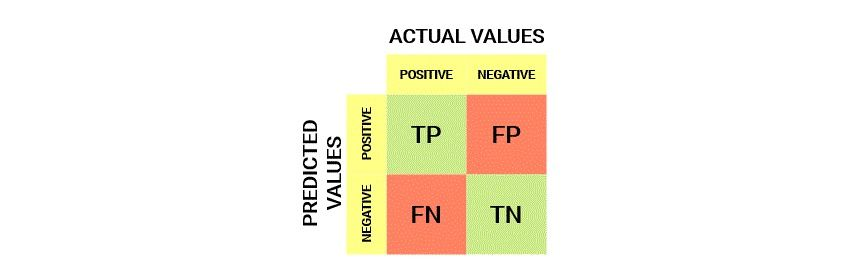

True positive (TP), False positive (FP), False negative (FN), True negative (TN)

In [28]:
class_report_random_forest = classification_report(y_test, y_pred_rf, target_names=['Negative', 'Neutral', 'Positive'])

In [29]:
print(class_report_random_forest)

              precision    recall  f1-score   support

    Negative       0.76      0.71      0.73      3062
     Neutral       0.69      0.65      0.67      1553
    Positive       0.76      0.82      0.79      3617

    accuracy                           0.75      8232
   macro avg       0.74      0.73      0.73      8232
weighted avg       0.75      0.75      0.74      8232



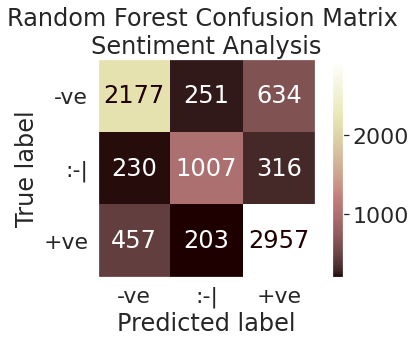

In [30]:
cm_display_rf = metrics.ConfusionMatrixDisplay(cm_rf, display_labels = ['-ve', ':-|', '+ve'])
cm_display_rf.plot(include_values=True, cmap = 'pink')
#cm_display.plot(cmap = 'pink')
plt.grid(False)
plt.title('Random Forest Confusion Matrix \nSentiment Analysis')
plt.show()

## 2. Naive Bayes Classifier
Naïve Bayes Classifier is one of the simple and most effective Classification algorithms which helps in building fast machine learning models that can make quick predictions. It is a probabilistic classifier, which means it predicts on the basis of the probability of an object.

In [31]:
model_naive_bayes = MultinomialNB()

model_naive_bayes.fit(X_train,y_train)

NB_prediction = model_naive_bayes.predict(X_test)

NB_accuracy = accuracy_score(y_test,NB_prediction)
print("Training accuracy : ",model_naive_bayes.score(X_train,y_train))
print("Testing/Validation accuracy : ",NB_accuracy )

# Confusion matrix
cm_nb = confusion_matrix(y_test, NB_prediction) # labels=[1,0])
#print('\n[[ TP FP]')
#print('[ FN TN]]')
print('\n',cm_nb)

print(classification_report(NB_prediction,y_test, target_names=['Negative', 'Neutral', 'Positive']))

Training accuracy :  0.7351556567957479
Testing/Validation accuracy :  0.6410349854227405

 [[1966    4 1092]
 [ 392   25 1136]
 [ 329    2 3286]]
              precision    recall  f1-score   support

    Negative       0.64      0.73      0.68      2687
     Neutral       0.02      0.81      0.03        31
    Positive       0.91      0.60      0.72      5514

    accuracy                           0.64      8232
   macro avg       0.52      0.71      0.48      8232
weighted avg       0.82      0.64      0.71      8232



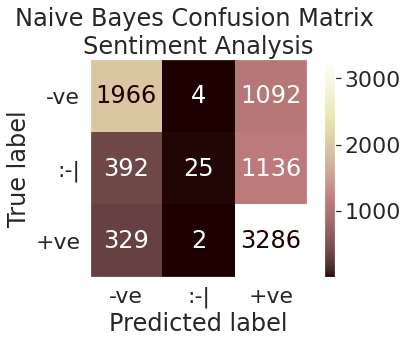

In [32]:
cm_display_nb = metrics.ConfusionMatrixDisplay(cm_nb, display_labels = ['-ve', ':-|', '+ve']) # display_labels = [True, False])
cm_display_nb.plot(include_values=True, cmap = 'pink')
plt.grid(False)
plt.title('Naive Bayes Confusion Matrix \nSentiment Analysis')
plt.show()

## 3. Stochastic Gradient Descent Classifier
A stochastic Gradient Descent Classifier is a type of machine learning algorithm that helps computers learn from data. It works by looking at a set of data points and using them to find patterns. It then uses those patterns to make predictions about future data points. It's like a teacher showing a student examples to help them understand a concept. 

In [33]:
model_sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

model_sgd_clf.fit(X_train,y_train)

sgd_prediction = model_sgd_clf.predict(X_test)
sgd_accuracy = accuracy_score(y_test,sgd_prediction)
print("Training accuracy  : ",model_sgd_clf.score(X_train,y_train))
print("Test/Validation accuracy : ",sgd_accuracy )
# Confusion matrix
cm_sgd = confusion_matrix(y_test, sgd_prediction) # labels=[1,0])
#print('\n[[ TP FP]')
#print('[ FN TN]]')
print('\n',cm_sgd)

print(classification_report(sgd_prediction,y_test,target_names=['Negative', 'Neutral', 'Positive']))

Training accuracy  :  0.8704935459377373
Test/Validation accuracy :  0.7776967930029155

 [[2490   89  483]
 [ 371  722  460]
 [ 350   77 3190]]
              precision    recall  f1-score   support

    Negative       0.81      0.78      0.79      3211
     Neutral       0.46      0.81      0.59       888
    Positive       0.88      0.77      0.82      4133

    accuracy                           0.78      8232
   macro avg       0.72      0.79      0.74      8232
weighted avg       0.81      0.78      0.79      8232



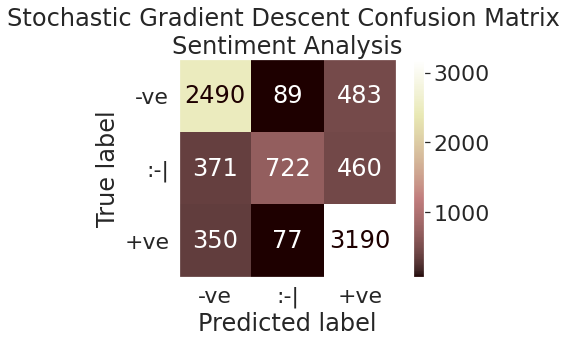

In [34]:
cm_display_sgd = metrics.ConfusionMatrixDisplay(cm_sgd, display_labels = ['-ve', ':-|', '+ve']) # display_labels = [True, False])
cm_display_sgd.plot(include_values=True, cmap = 'pink')
#cm_display.plot(cmap = 'pink')
plt.grid(False)
plt.title('Stochastic Gradient Descent Confusion Matrix \nSentiment Analysis')
plt.show()

## 4. Extreme Gradient Boosting Classifier - XGBoost
Extreme Gradient Boosting - XGBoost Classifier is a type of XGBoost algorithm for binary classification problems, where the target variable can take only two values, such as "yes" or "no", "positive" or "negative". It uses decision trees as its base learners and builds a group of these decision trees to make predictions


In [35]:
model_xgboost = xgb.XGBClassifier()

model_xgboost.fit(X_train, y_train)

xgb_prediction = model_xgboost.predict(X_test)
xgb_accuracy = accuracy_score(y_test,xgb_prediction)
print("Training accuracy : ",model_xgboost.score(X_train,y_train))
print("Test/Validation accuracy : ",xgb_accuracy )

# Confusion matrix
cm_xgb = confusion_matrix(y_test, xgb_prediction) # labels=[1,0])
#print('\n[[ TP FP]')
#print('[ FN TN]]')
print('\n',cm_xgb)

print(classification_report(xgb_prediction,y_test, target_names=['Negative', 'Neutral', 'Positive']))

Training accuracy :  0.6456795747911921
Test/Validation accuracy :  0.6381195335276968

 [[1836  159 1067]
 [ 264  426  863]
 [ 484  142 2991]]
              precision    recall  f1-score   support

    Negative       0.60      0.71      0.65      2584
     Neutral       0.27      0.59      0.37       727
    Positive       0.83      0.61      0.70      4921

    accuracy                           0.64      8232
   macro avg       0.57      0.63      0.57      8232
weighted avg       0.71      0.64      0.66      8232



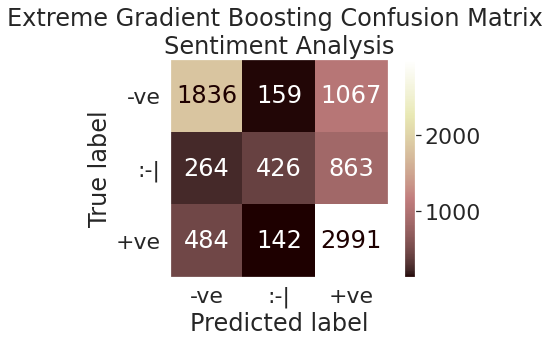

In [36]:
cm_display_xgb = metrics.ConfusionMatrixDisplay(cm_xgb, display_labels = ['-ve', ':-|', '+ve']) # display_labels = [True, False])
cm_display_xgb.plot(include_values=True, cmap = 'pink')
plt.grid(False)
plt.title('Extreme Gradient Boosting Confusion Matrix \nSentiment Analysis')
plt.show()

## 5. Logistic Regression Classifier
The logistic regression classifier model is also another commonly used machine learning model used for classifying data into two distinct categories such as "yes" or "no", or "positive" or "negative". This makes it well-suited for analyzing binary data and making binary predictions.

In [37]:
model_logreg = LogisticRegression()

model_logreg.fit(X_train, y_train)

logreg_prediction = model_logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test,logreg_prediction)
print("Training accuracy : ",model_logreg.score(X_train,y_train))
print("Test/Validation accuracy : ",logreg_accuracy)

# Confusion matrix
cm_logreg = confusion_matrix(y_test, logreg_prediction) # labels=[1,0])
#print('\n[[ TP FP]')
#print('[ FN TN]]')
print('\n',cm_logreg)

print(classification_report(logreg_prediction,y_test, target_names=['Negative', 'Neutral', 'Positive']))

Training accuracy :  0.9025360668185269
Test/Validation accuracy :  0.7874149659863946

 [[2462  178  422]
 [ 311  891  351]
 [ 346  142 3129]]
              precision    recall  f1-score   support

    Negative       0.80      0.79      0.80      3119
     Neutral       0.57      0.74      0.64      1211
    Positive       0.87      0.80      0.83      3902

    accuracy                           0.79      8232
   macro avg       0.75      0.78      0.76      8232
weighted avg       0.80      0.79      0.79      8232



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



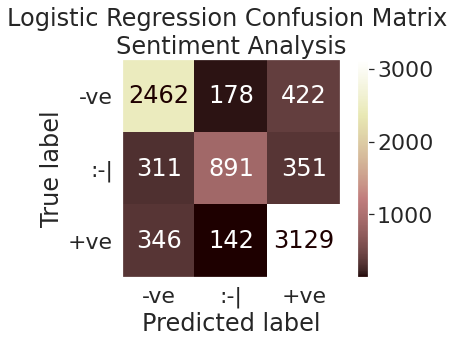

In [38]:
cm_display_logreg = metrics.ConfusionMatrixDisplay(cm_logreg, display_labels = ['-ve', ':-|', '+ve']) # display_labels = [True, False])
cm_display_logreg.plot(include_values=True, cmap = 'pink')
plt.grid(False)
plt.title('Logistic Regression Confusion Matrix \nSentiment Analysis')
plt.show()

## 6. Support Vector Machine Classifier
Support Vector Machine (SVM) is a powerful machine learning method for classification problems, which finds the optimal boundary to separate the data into different classes by maximizing the margin between the classes.

In [39]:
model_svc = SVC()   # ran over 20-min to complete

model_svc.fit(X_train, y_train)

svc_prediction = model_svc.predict(X_test)
svc_accuracy = accuracy_score(y_test,svc_prediction)
print("Training accuracy : ",model_svc.score(X_train,y_train))
print("Test/Validation accuracy : ",svc_accuracy)

# Confusion matrix
cm_svc = confusion_matrix(y_test, svc_prediction) # labels=[1,0])
#print('\n[[ TP FP]')
#print('[ FN TN]]')
print('\n',cm_svc)

print(classification_report(svc_prediction,y_test, target_names=['Negative', 'Neutral', 'Positive']))

Training accuracy :  0.9786788154897494
Test/Validation accuracy :  0.7776967930029155

 [[2458  159  445]
 [ 339  847  367]
 [ 390  130 3097]]
              precision    recall  f1-score   support

    Negative       0.80      0.77      0.79      3187
     Neutral       0.55      0.75      0.63      1136
    Positive       0.86      0.79      0.82      3909

    accuracy                           0.78      8232
   macro avg       0.73      0.77      0.75      8232
weighted avg       0.79      0.78      0.78      8232



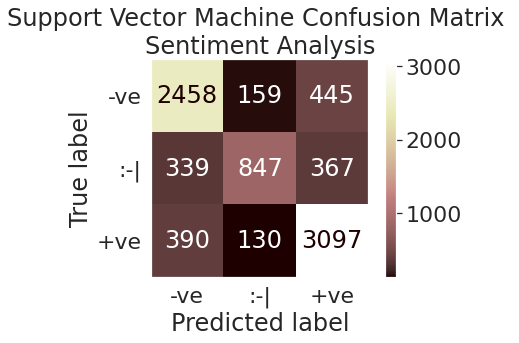

In [40]:
cm_display_svc = metrics.ConfusionMatrixDisplay(cm_svc, display_labels = ['-ve', ':-|', '+ve']) # display_labels = [True, False])
cm_display_svc.plot(include_values=True, cmap = 'pink')
plt.grid(False)
plt.title('Support Vector Machine Confusion Matrix \nSentiment Analysis')
plt.show()

## 7. Linear Support Vector Machine Classifier
Linear Support Vector Machine (SVM) Classifier is a type of SVM algorithm used for linear binary classification problems, where the data is separated into different classes using a linear boundary (or hyperplane) with the maximum margin.

In [41]:
model_linear_svc = LinearSVC()

model_linear_svc.fit(X_train, y_train)

lsvc_prediction = model_linear_svc.predict(X_test)
lsvc_accuracy = accuracy_score(y_test,lsvc_prediction)
print("Training accuracy : ",model_linear_svc.score(X_train,y_train))
print("Test/Validation accuracy : ",lsvc_accuracy)

# Confusion matrix
cm_lsvc = confusion_matrix(y_test, lsvc_prediction) # labels=[1,0])
#print('\n[[ TP FP]')
#print('[ FN TN]]')
print('\n',cm_lsvc)

print(classification_report(lsvc_prediction,y_test,target_names=['Negative', 'Neutral', 'Positive']))

Training accuracy :  0.9705087319665907
Test/Validation accuracy :  0.7993197278911565

 [[2491  184  387]
 [ 263  986  304]
 [ 319  195 3103]]
              precision    recall  f1-score   support

    Negative       0.81      0.81      0.81      3073
     Neutral       0.63      0.72      0.68      1365
    Positive       0.86      0.82      0.84      3794

    accuracy                           0.80      8232
   macro avg       0.77      0.78      0.78      8232
weighted avg       0.80      0.80      0.80      8232



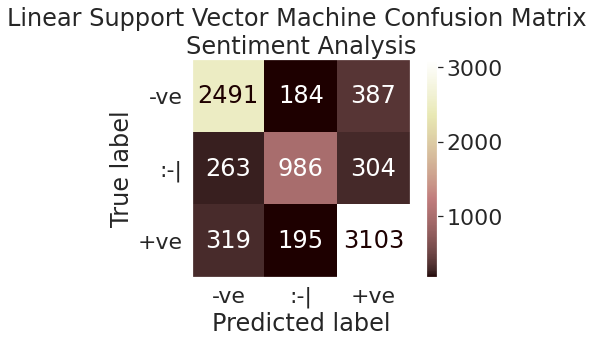

In [42]:
cm_display_lsvc = metrics.ConfusionMatrixDisplay(cm_lsvc, display_labels = ['-ve', ':-|', '+ve']) # display_labels = [True, False])
cm_display_lsvc.plot(include_values=True, cmap = 'pink')
plt.grid(False)
plt.title('Linear Support Vector Machine Confusion Matrix \nSentiment Analysis')
plt.show()

# Model Accuracy Comparison
Now, lets compare and visualize above models for more better understanding. 

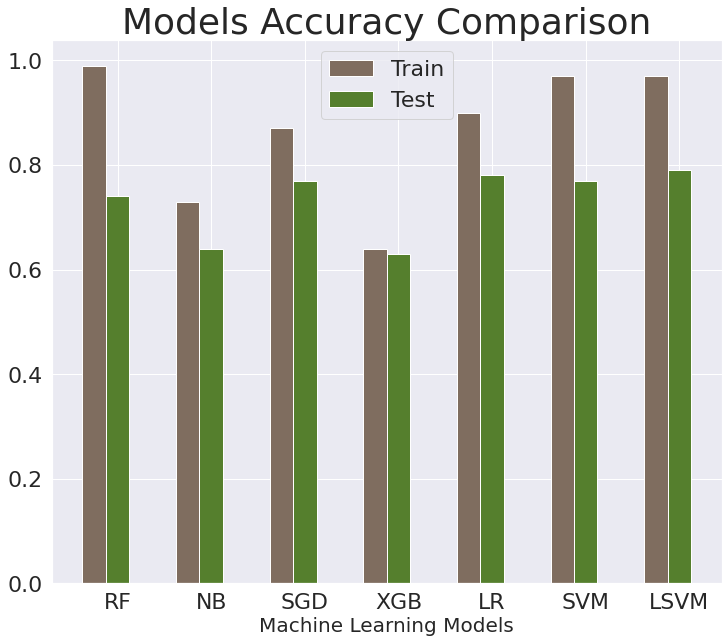

In [43]:
# set width of bars
barWidth = 0.25
 
# set heights of bars
bars1 = [0.99, 0.73, 0.87, 0.64, 0.90, 0.97, 0.97]
bars2 = [0.74, 0.64, 0.77, 0.63, 0.78, 0.77, 0.79]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
plt.figure(figsize=(12,10))
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='Train')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='Test')
 
# Add xticks on the middle of the group bars
plt.xlabel('Machine Learning Models', size = 20)
plt.xticks([r + barWidth for r in range(len(bars1))], ['RF', 'NB', 'SGD', 'XGB', 'LR','SVM','LSVM'])
plt.title('Models Accuracy Comparison', size = 36)
 
# Create legend & Show graphic

plt.legend()
plt.show()

Comparison plot show the `XGB - Extreme gradient boosting classifier` performs the best with accuracy of `0.64` and `0.63` for training and testing data. `Random forest classifer` accuray is very low.

Now let's tune the random forest classifier and see if the accuracy gets any better.

## Hyperparameter tuning
`GridSearchCV` and `RandomizedSearchCV` are two widely used techniques in Hyperparameter Tuning. Grid Search exhaustively searches through every combination of the hyperparameter values specified. In contrast to Grid Search, not all given parameter values are tried out in Randomized Search. Rather a fixed number of parameter settings is sampled from the specified distributions. 

In this project, we are using RandomizedSearchCV only to tune the random forest classifier.

In [ ]:
# Define the parameter grid to search
param_dist = {

    'n_estimators': [50, 200, 500, 1000, 2500],        # no of boosting stages to perform, large no usually result in better performance   # np.arange(50, 200, 500, 1000, 2500))
    'max_depth': [3, 5, 9, 15, 25],                 # max depth limits the number of nodes    # np.arange(3, 15)
   # 'min_samples_split': np.arange(2, 10),         # min no of samples required to split internal node
   # 'min_samples_leaf': np.arange(1, 5),           # min no of samples to be a leaf node
    'max_features': ['auto', 'log2']                # no of features to consider when looking for best fit, when 'auto', 'sqrt','log2'=sqrt(n_features), default = (n_features)
}

# Create a random forest classifier
model_random_forest = RandomForestClassifier()

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=model_random_forest, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train, y_train)

# Print the best hyperparameters and the best score
print("Best parameters: \n", random_search.best_params_)
print("Best accuracy score: ", random_search.best_score_)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning:

The total space of parameters 50 is smaller than n_iter=100. Running 50 iterations. For exhaustive searches, use GridSearchCV.



Best parameters: 
 {'n_estimators': 500, 'max_features': 'auto', 'max_depth': 25}
Best accuracy score:  0.5857251328777524


The code above perform a random search over the defined parameter distribution for the random forest classifier, using 5-fold cross-validation and accuracy as the evaluation metric. The n_iter parameter defines the number of iterations to perform the random search. The best hyperparameters and the corresponding best accuray score is printed after the search which are, 

`Best parameters:{'n_estimators': 500, 'max_features': 'auto', 'max_depth': 25}`

`Best accuracy score:  0.5857251328777524`

Here, 

Accuracy score is `0.58` but previously we got `0.99` accuracy on training, which means Random Forest Classifer may not be the best classifer in our case. 

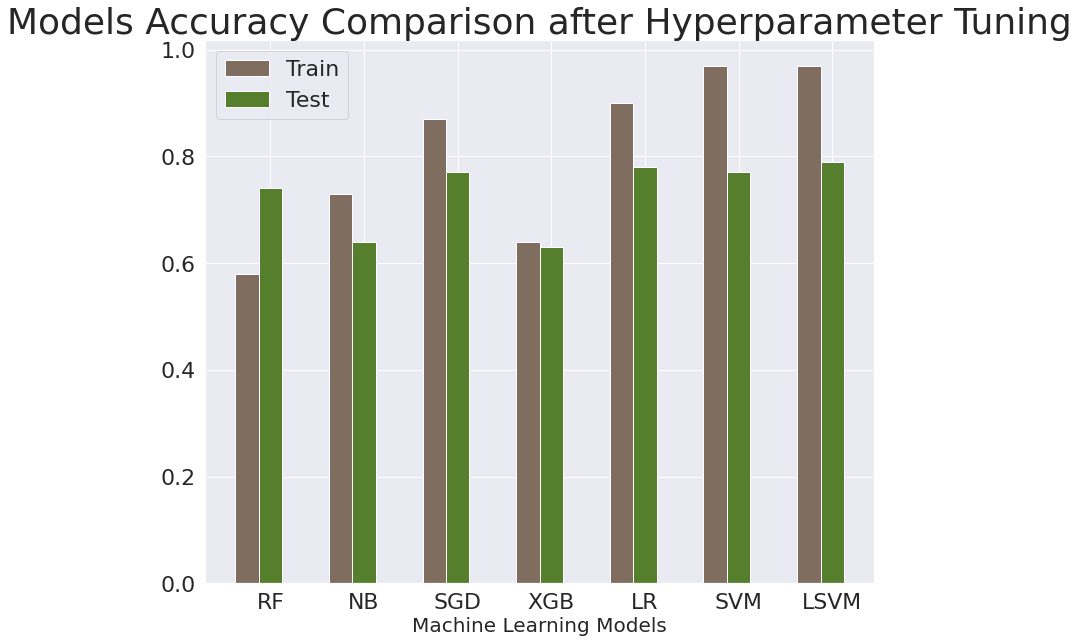

In [42]:
# set width of bars
barWidth = 0.25
 
# set heights of bars
bars1 = [0.58, 0.73, 0.87, 0.64, 0.90, 0.97, 0.97]
bars2 = [0.74, 0.64, 0.77, 0.63, 0.78, 0.77, 0.79]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
plt.figure(figsize=(12,10))
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='Train')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='Test')
 
# Add xticks on the middle of the group bars
plt.xlabel('Machine Learning Models', size = 20)
plt.xticks([r + barWidth for r in range(len(bars1))], ['RF', 'NB', 'SGD', 'XGB', 'LR','SVM','LSVM'])
plt.title('Models Accuracy Comparison after Hyperparameter Tuning', size = 36)
 
# Create legend & Show graphic

plt.legend()
plt.show()

# Feature Importances
Now check the most important features in our dataset

In [95]:
from sklearn.preprocessing import LabelEncoder

# Normalize and transform labels between 0 and 1
le = LabelEncoder()
  
# Encode labels in column 'Sentiment'.
data_twitter_corona_train['Sentiment'] = le.fit_transform(data_twitter_corona_train['Sentiment'])
  
data_twitter_corona_train['Sentiment'].unique()

array([1, 2, 0])

In [94]:
find_word = 'London'
if find_word in data_twitter_corona_train['Sentiment'].values:
  print('word found')

In [65]:
# one-hot encode the 'Sentiment' column
data_twitter_corona_train = pd.get_dummies(data_twitter_corona_train, columns=['Sentiment'])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd

# load your data into a pandas dataframe called 'data_twitter_corona_train'
# ...

# specify the hyperparameters you want to search over
param_dist = {'n_estimators': [10] #[100] #, 200, 300],
              #'max_depth': [10, 20, 30],
              #'min_samples_split': [2, 5, 10]
              }

# create a RandomForestClassifier object
rf = RandomForestClassifier()

# create a RandomizedSearchCV object
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=1, scoring='accuracy', n_jobs=-1, cv=5)

# fit the RandomizedSearchCV object to your data
random_search.fit(X_train, y_train)
#random_search.fit(data_twitter_corona_train.drop('text', axis=1), data_twitter_corona_train['text'])

# calculate feature importances
feature_results = pd.DataFrame({'feature': list(data_twitter_corona_train.drop('Sentiment', axis=1).columns),
                                'importance': random_search.best_estimator_.feature_importances_})


In [103]:
# Extract the feature importances into a dataframe

#feature_results = pd.DataFrame({'feature': list(data_twitter_corona_train.drop('Sentiment', axis=1).columns),
 #                               'importance': random_search.best_estimator_.feature_importances_})


#feature_results = pd.DataFrame({'feature': list(data_twitter_corona_train['Sentiment']), 
#                                'importance': random_search.feature_importances_})

# Show the most important features
#feature_results = feature_results.sort_values('importance', ascending = False).reset_index(drop=True)


feature_results = feature_results.sort_values('feature', ascending = True).reset_index(drop=True)


feature_results.head(10)

,feature
0,Location
1,OriginalTweet
2,ScreenName
3,Sentiment
4,TweetAt
5,UserName
6,clean_text
7,final_text
8,text


In [113]:
# Random Forest chooses the optimum split while Extra Trees chooses it randomly

from sklearn.ensemble import ExtraTreesClassifier
extr = ExtraTreesClassifier()
extr.fit(X_train,y_train)

ExtraTreesClassifier()

In [114]:
feature_importance = extr.feature_importances_
feature_importance

array([3.42441187e-07, 7.17407691e-06, 8.11090770e-07, ...,
       7.00743507e-09, 6.61832025e-10, 6.83807083e-06])

In [115]:
imp = pd.DataFrame(feature_importance, columns =['Gain_Score'])
imp

,Gain_Score
0,3.424412e-07
1,7.174077e-06
2,8.110908e-07
3,1.829644e-07
4,6.376677e-08
...,...
46046,2.278259e-07
46047,0.000000e+00
46048,7.007435e-09
46049,6.618320e-10


In [116]:
gains = pd.concat([feature_results, imp],axis =1)
gains.head(10)

,feature,Gain_Score
0,Location,3.424412e-07
1,OriginalTweet,7.174077e-06
2,ScreenName,8.110908e-07
3,Sentiment,1.829644e-07
4,TweetAt,6.376677e-08
5,UserName,1.285435e-06
6,clean_text,3.638496e-06
7,final_text,3.639022e-06
8,text,1.841894e-06
9,NaN,3.311695e-06


Table above shows the most import features in our data and their score respectively.

# Conclusion
In this study, we employed various Natural Language Processing techniques such as Tokenization, Lemmatization, and TF-IDF to structure our data, followed by cleaning, organization, and pre-processing. We evaluated multiple machine learning models to determine their accuracy and conducted hyperparameter tuning to optimize their performance.

All models achieved above-average results, with the exception of the Extreme Gradient Boosting Classifier, which had a training accuracy of 64% and a testing accuracy of 63%. This deviation could be attributed to the limited size of the data, as some models tend to perform better with larger datasets. Hyperparameter tuning revealed the optimal parameters for the Random Forest Classifier.

Our results indicate that the data was clean and unbiased, with no missing values. The models performed with minimal errors and losses, despite the small size of the dataset. We did not observe any overfitting or underfitting issues, as the data was not extensive enough to draw such conclusions.


# Future Work
Due to the time constraint, we are unable to perform more detailed analysis as alot can be done with this data to learn more about it. Here are few things we could do in the future,

1. Plot confusion matrix on test data for comparison with training data to perform a more detailed sentiment analysis on every model.
2. Overfitting and underfitting are two common problems in machine learning that can affect the accuracy and generalization of a model. In our case, the data is not huge but still there are some ways to check for these issues:

> - Validation Curves: Plotting the performance of a model on both the training and validation datasets can help to identify overfitting and underfitting. If the model performs well on the training data but poorly on the validation data, then it is likely to be overfitting. On the other hand, if the model performs poorly on both datasets, then it may be underfitting.

> - Learning Curves: Plotting the performance of a model as a function of the number of training examples can also help to identify overfitting and underfitting. If the performance on the training set increases with more training examples but the performance on the validation set decreases, then the model is overfitting. If the performance on both datasets increases but not to a satisfactory level, then the model is underfitting.

> - Cross-Validation: Cross-validation is a technique for evaluating the performance of a model by splitting the data into several folds and training the model on different combinations of these folds. If the model's performance varies greatly depending on the fold it was trained on, then it is overfitting.

> - Regularization: Regularization is a technique for reducing overfitting by adding a penalty term to the loss function that discourages the model from learning noise in the data. If the performance of a model improves with regularization, then it is likely to be overfitting.

> In general, finding the right balance between overfitting and underfitting requires experimentation and a thorough understanding of the problem and the data.


